### There is a banking campaign, in which, the success rate of the campaign would be evaluated in different years. There are some results from the previous and current campaign which are going to be used for model training and evaluation.
### Campaign collect many usefull data, which is precious. However, there are many unknown values in dataset which is not desirable but we are going to manage that to see if we are able to predict the results of next campaign.
### Therefore, based on the available data and those we are going to select, the model will be trained with neural network and regression to see which one perform better in generalization of the campaign outcome.
### We hope to achieve a good model to evaluate the next campaign and to see how we could make the next campaign more effective and beneficial for banking systems.

In [1]:
# First of all, the required libraries could be imported here.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#The available data from the banking campaign is read here into pandas data frame. It should be noted that the separator is ; but not , which is normal in csv files.
df=pd.read_csv('bank-additional-full.csv', sep=';')
#Data frame is shown here to have the general overview.
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# Checking if there is any missing values in dataset, which needs to be replaced to explicitly manipulated to avoid any problems.
df.isnull().sum()
#Hopefully, there are no missing values in dataset. However, there are so many unknown values which will be handled soon.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
# Check the general detail of the dataset by describe command to see if there is common or irrational mistakes or if there is any outliers.
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#Number of instances could be calculated using size method of dataframe.
df.size

864948

In [6]:
# Checking if each column has the correct type.
df.dtypes
#It seems the columns have the correct type meaning that there is no explicit uncommon or wrong type of data in the columns of the dataframe.

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

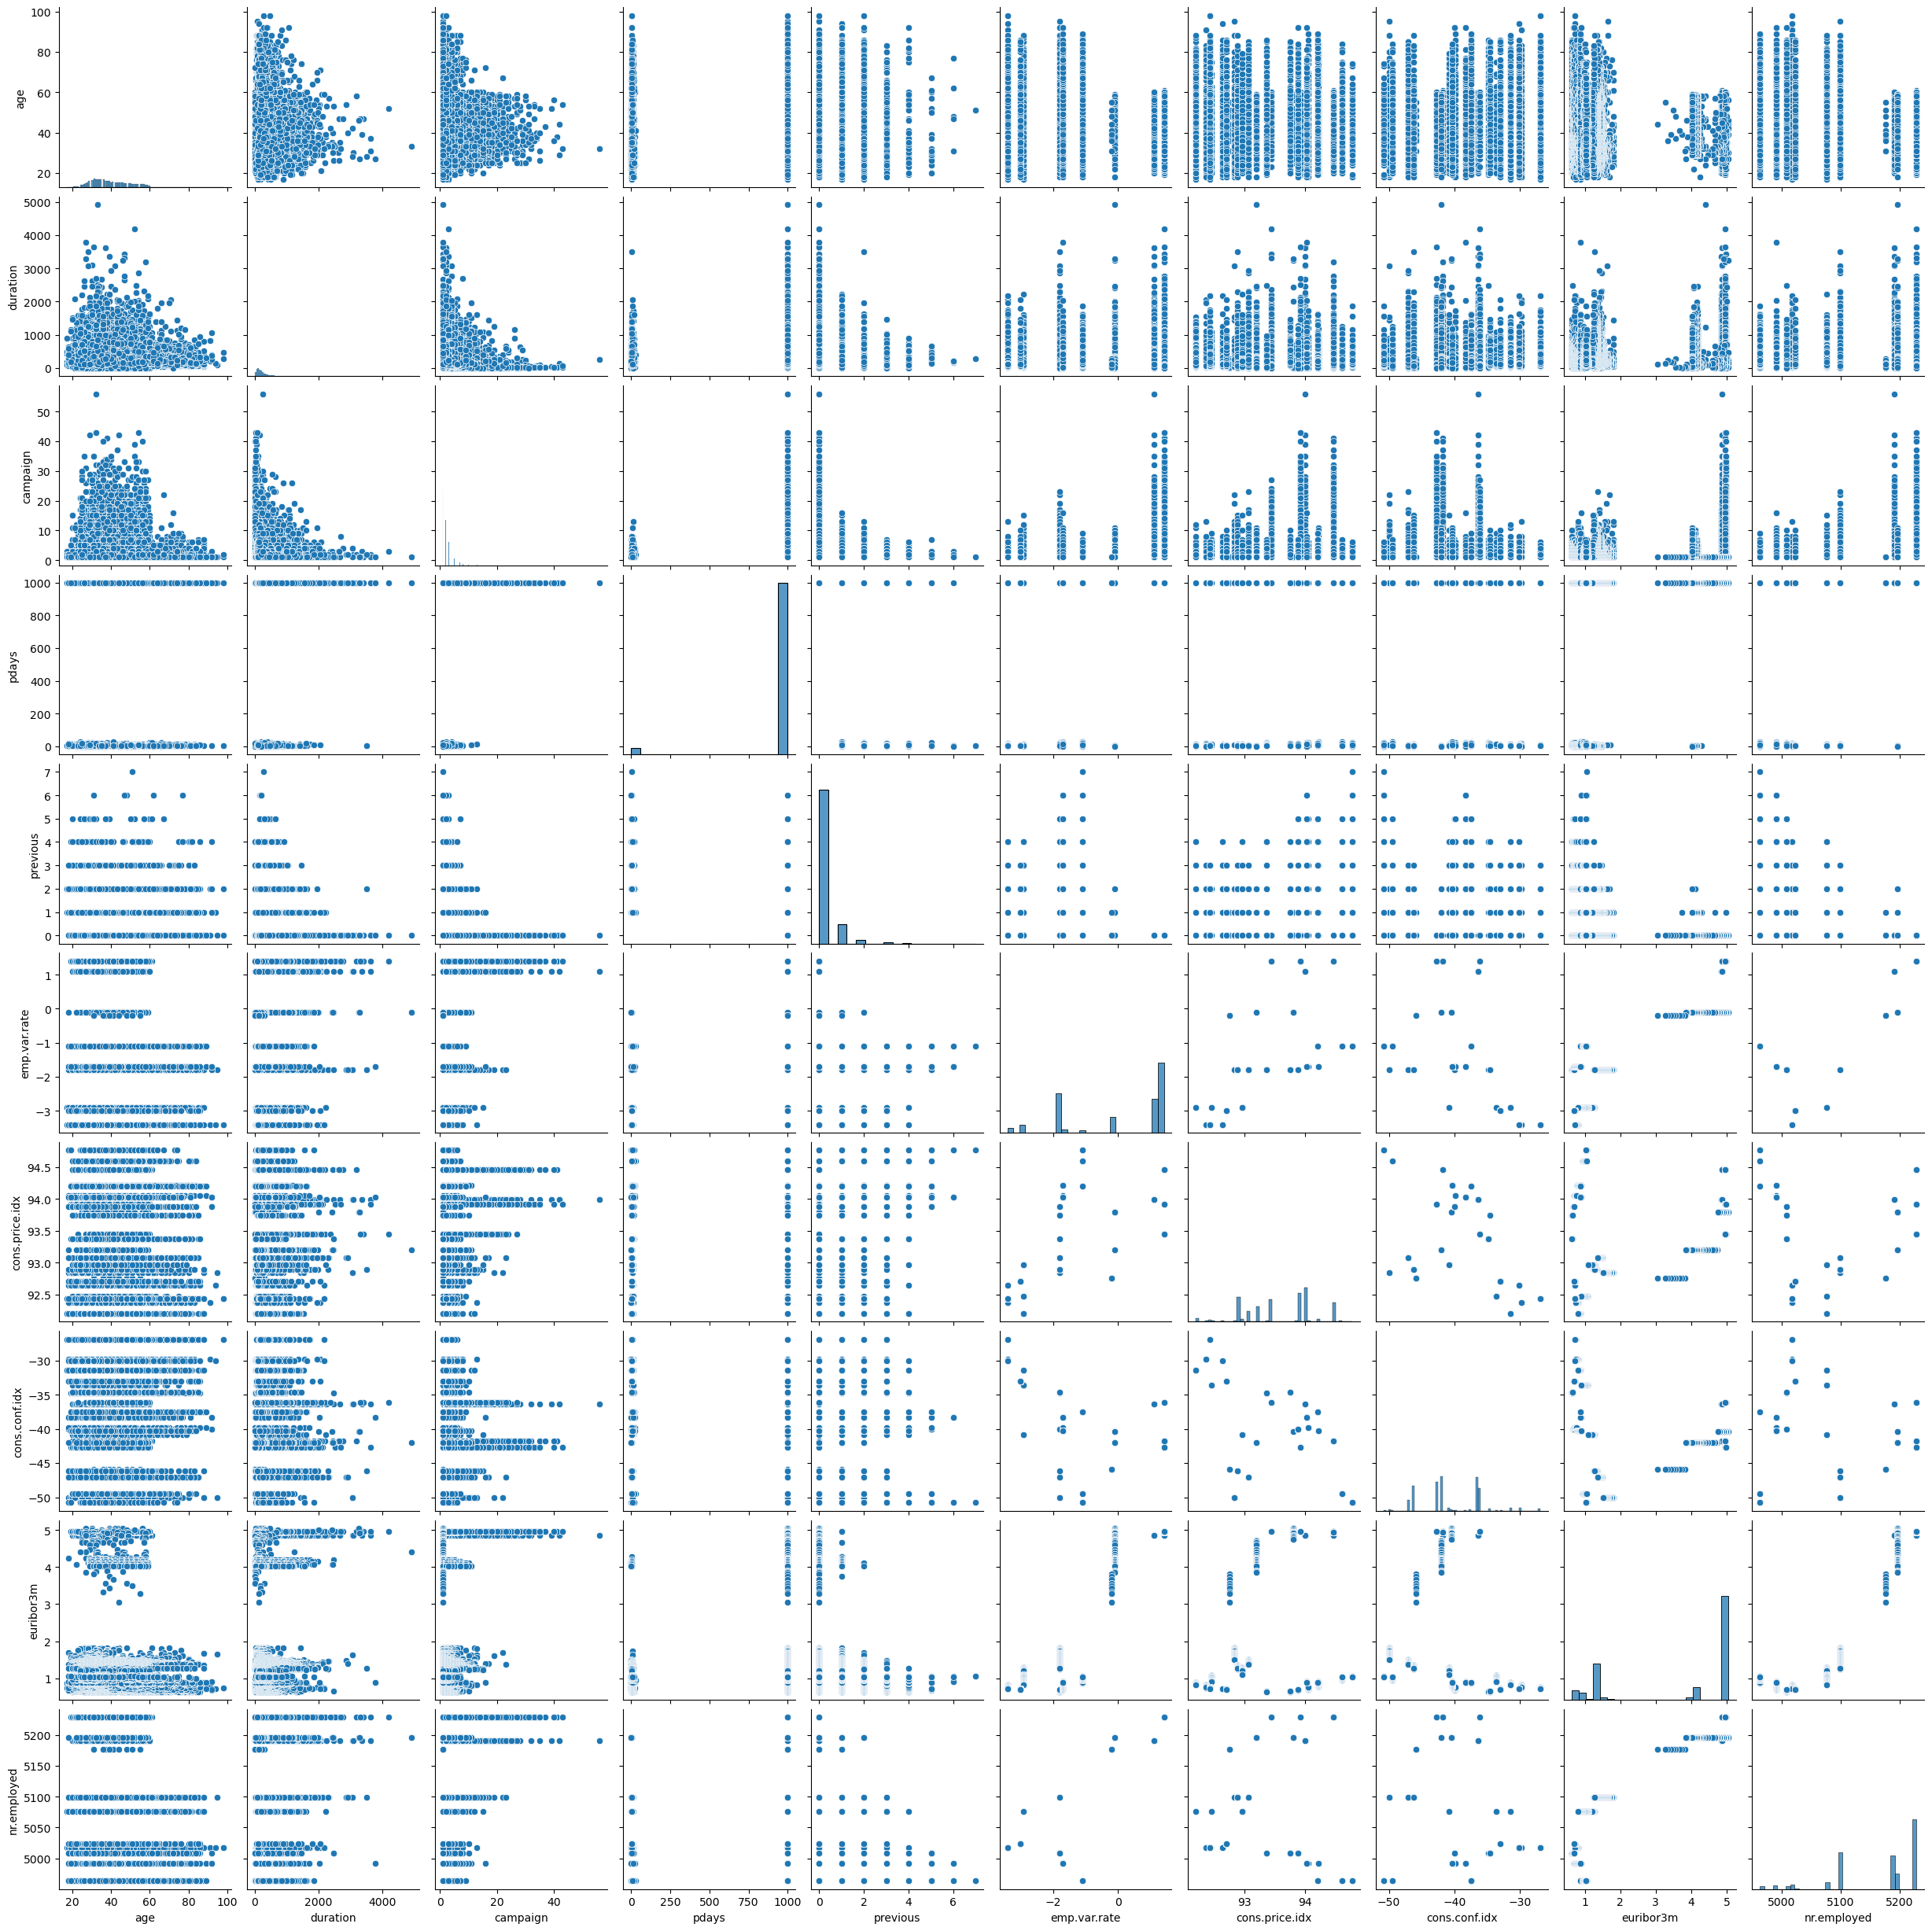

In [7]:
#Drawing pairwise graphs for numerical data to visually inspect the quality of data. Boxplot and histogram also could be drawn to identify outliers and some obvious issues.
sns.pairplot(df[df.select_dtypes(include=['int64', 'float64']).columns])
plt.show()
# Data seems to be acceptable and there is no main concern to be manipulated and fixed.

<Axes: xlabel='y'>

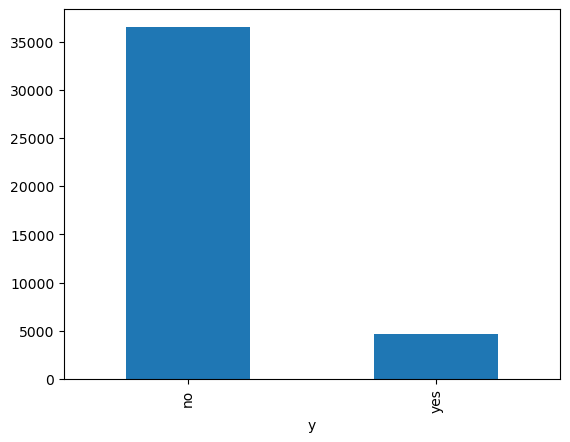

In [8]:
#Visually investigate the target results by counting the target output, which is obvious that the main output is negative.
df["y"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Age histogram')

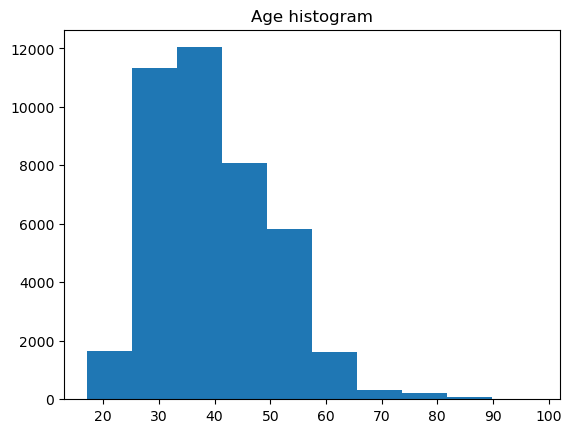

In [9]:
# It is usefull to investigate the histogram and box plot for visual inspection of data and have general overview.
plt.hist(df["age"])
plt.title("Age histogram")
# It could be seen that the majority of people is between 25 and 50. Therefore, the middle age has been more targetted than other groups.

{'whiskers': [<matplotlib.lines.Line2D at 0x1553f178ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x1554b4a2110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1553c721510>],
 'medians': [<matplotlib.lines.Line2D at 0x1554b4a3190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554b4a3a10>],
 'means': []}

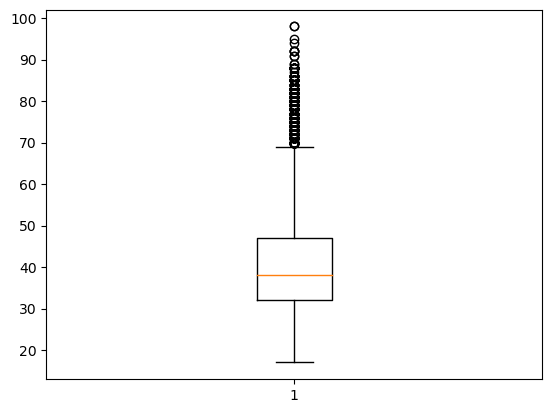

In [10]:
#Boxplot is one of the powerful tools to visually investigate the data and identify the possible outliers.
plt.boxplot(df["age"])
#Based on the boxplot, ther are osme outliers but they are generally correct ages. As there are many, it is better to keep and they did not show any bad graphical outcome on the previous pairwise graphs.

Maximum call durations in seconds are: 
 duration
90     170
85     170
136    168
73     167
124    164
Name: count, dtype: int64


Text(0.5, 1.0, 'Call duration')

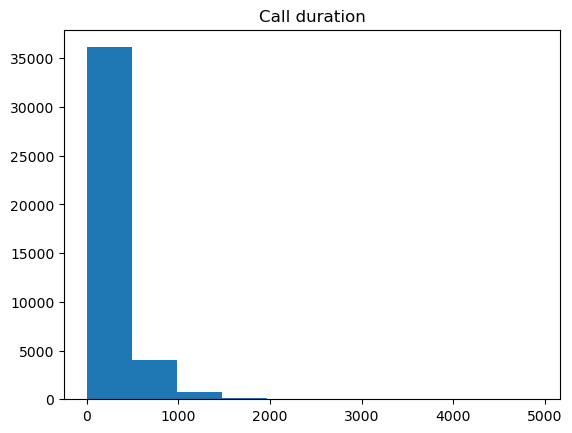

In [11]:
print('Maximum call durations in seconds are: \n', df['duration'].value_counts().head())
plt.hist(df["duration"])
plt.title("Call duration")
# THe most frequent calls take 85 and 90 seconds.
#As was seen in the boxplot, zero duration affect the result to huge amount. Therefore, it is better to drop this feature to have more realistic resutls.

{'whiskers': [<matplotlib.lines.Line2D at 0x1554b6899d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1554b68af50>,
 'boxes': [<matplotlib.lines.Line2D at 0x155469ee610>],
 'medians': [<matplotlib.lines.Line2D at 0x1554b694290>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554b46cd10>],
 'means': []}

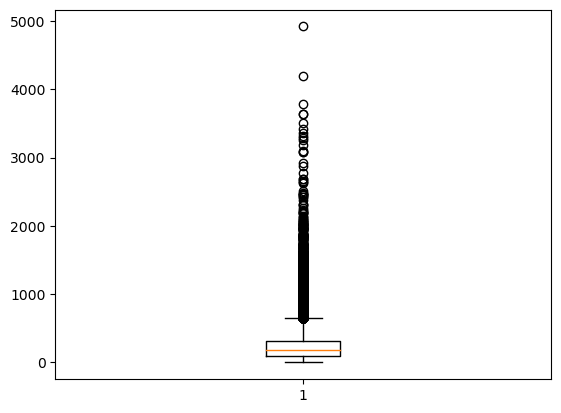

In [12]:
plt.boxplot(df["duration"])
# AS could be seen the zero duration or no answering calls affect too much on the data and makes many data as outliers. THerefore, it would be beneficial to remove zero timing to achieve better output.

4107     56
13447    43
18728    43
Name: campaign, dtype: int64

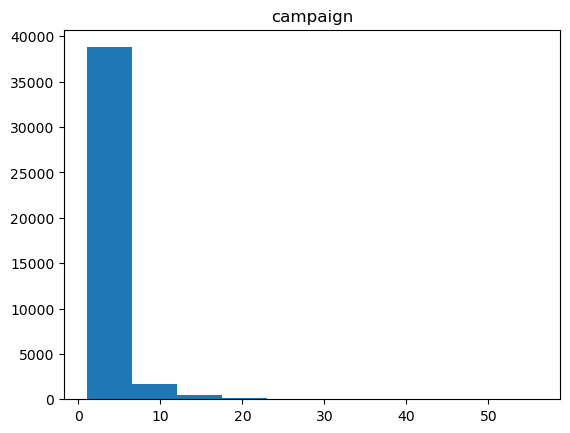

In [13]:
#It could be observed that the majory of contact number is low while there are some contact number as much as 56 times which is interesting to know the reason.
plt.hist(df["campaign"])
plt.title("campaign")
df["campaign"].nlargest(3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1554b51b310>,
 'caps': [<matplotlib.lines.Line2D at 0x1554b533e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1554b5321d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1554b541390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1554b541d50>],
 'means': []}

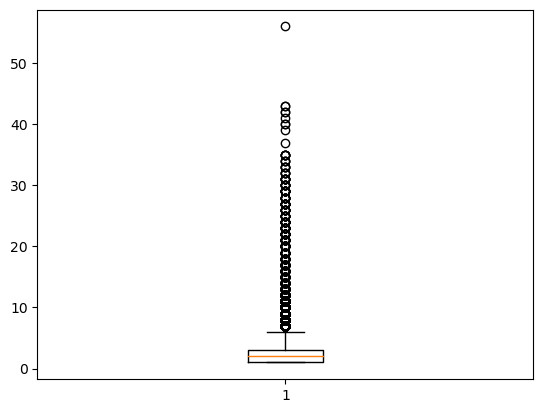

In [14]:
#Histogram for the number of performed contacts.
plt.boxplot(df["campaign"])
#Interestingly, there are some people whi has been contacted 40 or even more than 50 times, which could be an interesting part to see what the reason is and how was the results for this specific group.

(array([ 1515.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 39673.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

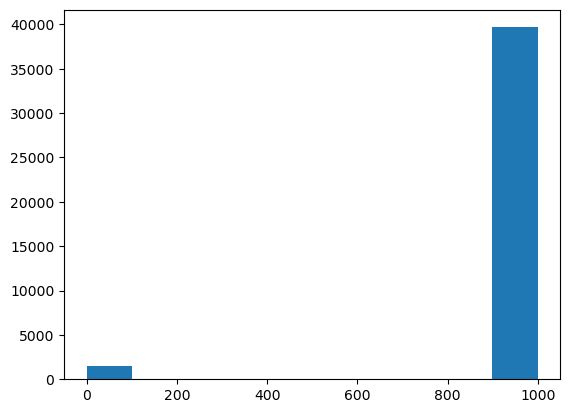

In [15]:
#The number of days that passed by after the client was last contacted from a
#previous campaign
plt.hist(df['pdays'])
#It could be seen that the most people are contacted for the first time presented as the number of 999 in the following graph.

(array([3.5563e+04, 4.5610e+03, 7.5400e+02, 0.0000e+00, 2.1600e+02,
        7.0000e+01, 0.0000e+00, 1.8000e+01, 5.0000e+00, 1.0000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

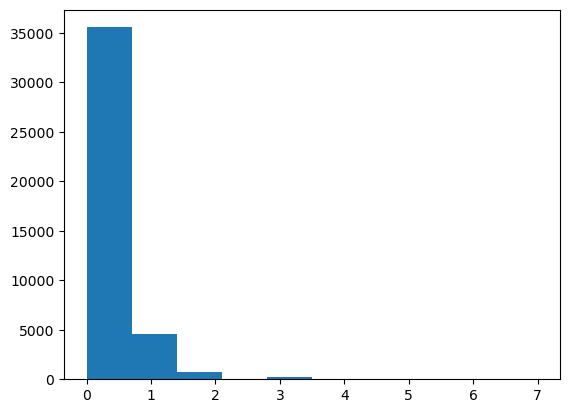

In [16]:
# The number of contacts performed before this campaign
plt.hist(df["previous"])

Text(0.5, 1.0, 'Has housing loan?')

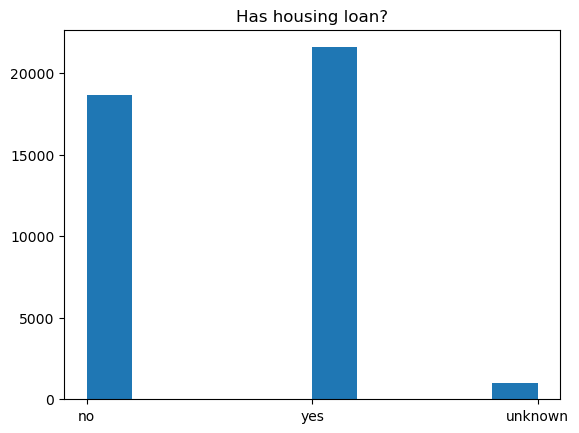

In [17]:
# Has person the housing loan when they are contacted?
plt.hist(df["housing"])
plt.title("Has housing loan?")


Text(0.5, 1.0, 'Has personal loan?')

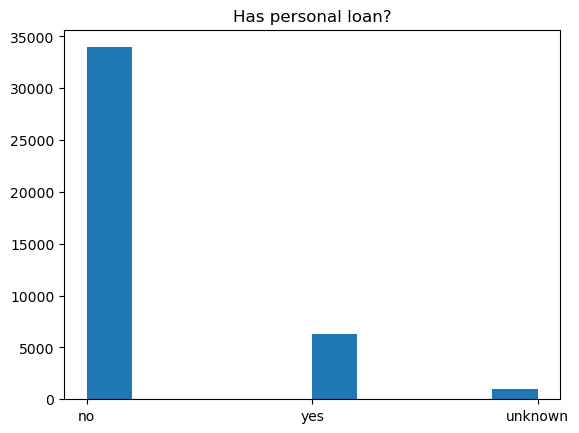

In [18]:
# Has person the personal loan when they were contacted?
plt.hist(df["loan"])
plt.title("Has personal loan?")
#The majority of contacted people did not have a previous personal loan.

(array([13769.,  5318.,  7174.,  6178.,   718.,  4101.,   182.,   546.,
         2632.,   570.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

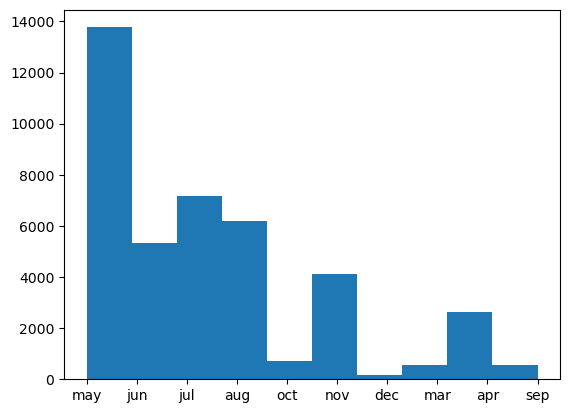

In [19]:
# Last contact month of year
plt.hist(df["month"])
#The majority of contact occured in may and generally contact in summer time is higher than other periods.

(array([35563.,     0.,     0.,     0.,     0.,  4252.,     0.,     0.,
            0.,  1373.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

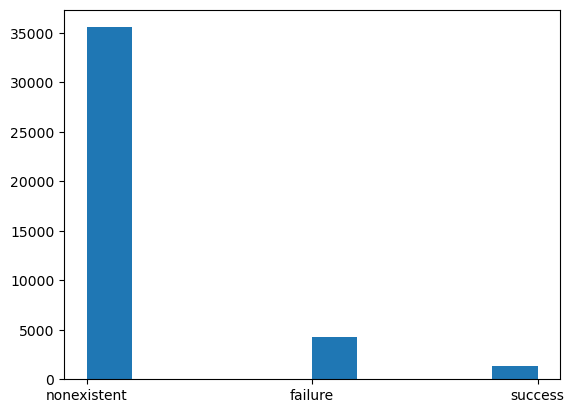

In [20]:
# Outcome of the previous marketing campaign
plt.hist(df["poutcome"])
#Unfortunately, there are a lot of missing values for previous campaign which is not desirable.

Text(0.5, 1.0, 'euribor 3 month rate')

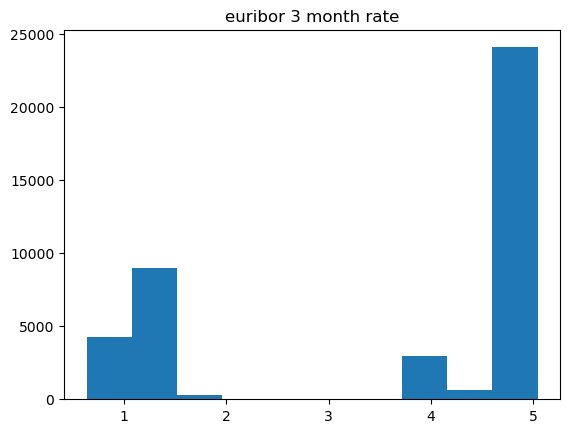

In [21]:
#euribor 3 month rate
plt.hist(df["euribor3m"])
plt.title("euribor 3 month rate")
#As the interest rate increase, banks are happier to give loan and make profit out of it.

Text(0.5, 1.0, 'Number of employees')

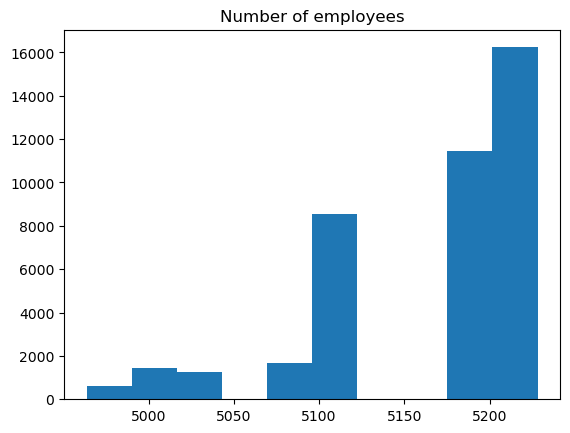

In [22]:
#Number of employees
plt.hist(df["nr.employed"])
plt.title("Number of employees")
#Larger companies have been more under contact.

Text(0.5, 1.0, 'Education')

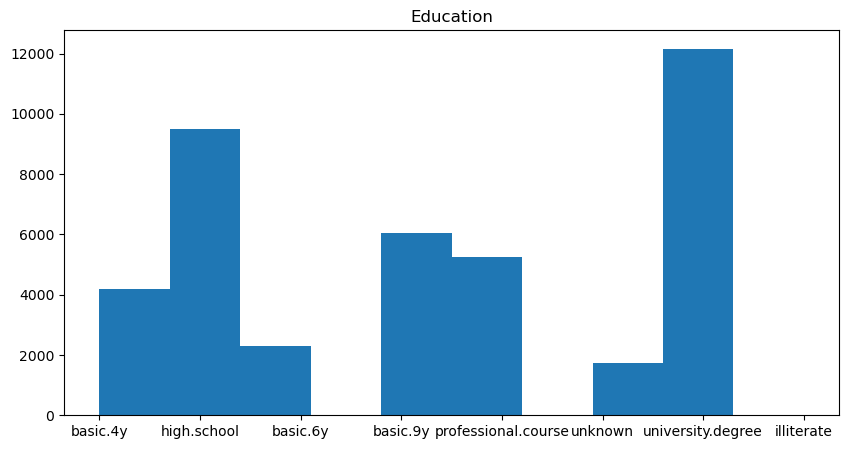

In [23]:
#Education level of contacted persons
plt.figure(figsize=(10, 5))
plt.hist(df["education"])
plt.title("Education")
#Ones with university degree or who are at high school have been contacted more.

Text(0.5, 1.0, 'Employment variation rate')

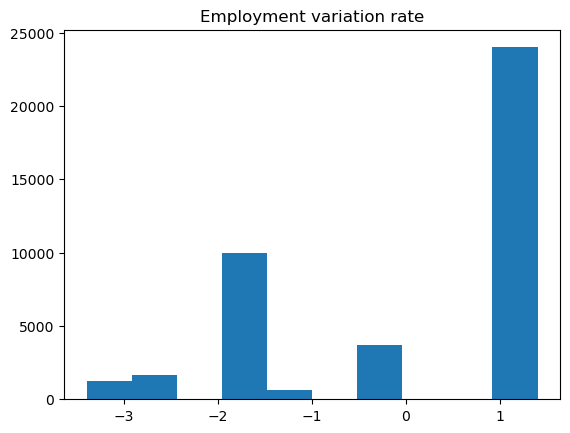

In [24]:
#Employment variation rate
plt.hist(df["emp.var.rate"])
plt.title("Employment variation rate")
#There has been more call to has the positive employment rate.

Text(0.5, 1.0, 'Type of job')

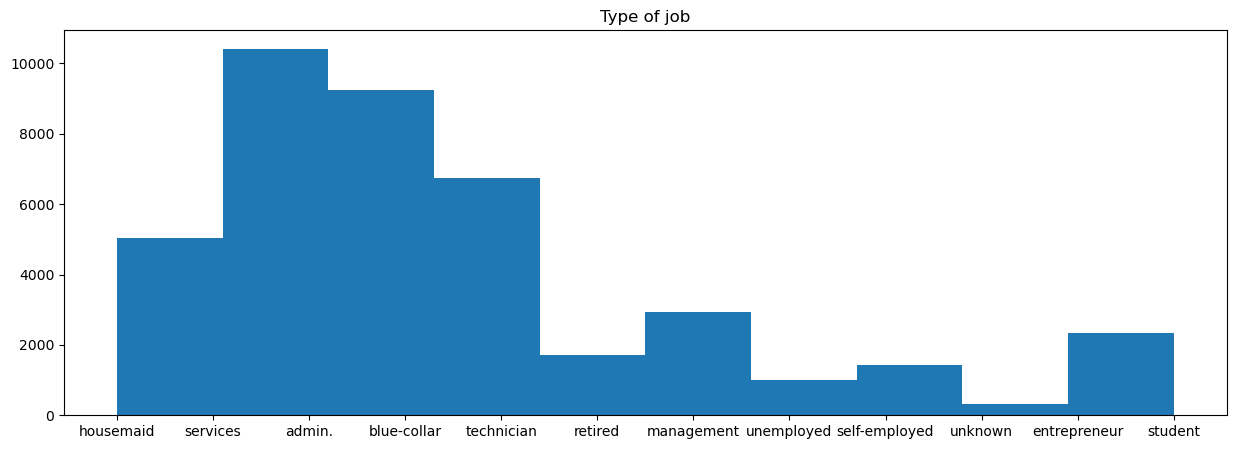

In [25]:
#Type of job
plt.figure(figsize=(15, 5))
plt.hist(df["job"])
plt.title("Type of job")
#THere have been more calls to admins and service providers.

Text(0.5, 1.0, 'Marital status')

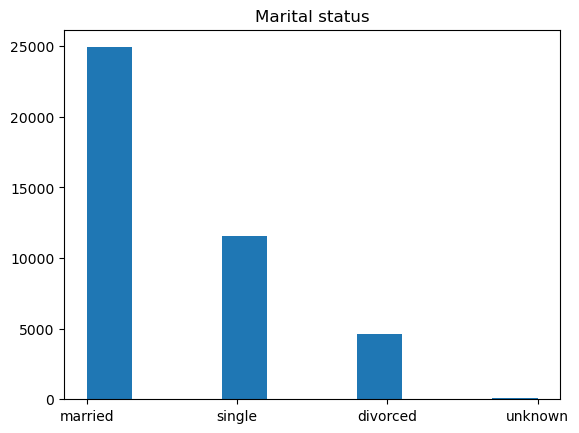

In [26]:
#Marital status of contacted person
plt.hist(df["marital"])
plt.title("Marital status")
# Married people have been contacted more than others.

In [27]:
#Zero call duration indicated that there have been no call, there fore we should remove those data as they are irrelevant.
print('Number of unsuccessfull call:', (df['duration']==0).sum())
dfs= df[df['duration'] != 0]

Number of unsuccessfull call: 4


In [28]:
# Selection of features
#THere are too many features from the campaign. However, we could ignore some of them to have simpler model and calculation.
#Some negligible data have been removed in the model such as day of week. However it could be important to know which day is the best time to contact, knowing about the month could be also a good representative for now.
#cons.conf.idx parameter is hard to understand. Although it could affect the results, it seems that it has a negligible effect on the outcome. However, there should be more research to know what is the effect of this parameter.
X0 = dfs[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'y']]
X0

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,261,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,149,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,226,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,151,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,307,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,334,1,999,0,nonexistent,-1.1,94.767,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,383,1,999,0,nonexistent,-1.1,94.767,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,189,2,999,0,nonexistent,-1.1,94.767,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,442,1,999,0,nonexistent,-1.1,94.767,1.028,4963.6,yes


In [29]:
#Selecting the target values as label and drop it from the training set.
y0=dfs['y']
X=X0.drop("y", axis=1)
#y
#X

In [30]:
#Now we do standardization based on the min max scalar to have unbiased results. This will be done on numerical values.
scaler = MinMaxScaler()
num = ['age', "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "euribor3m", "nr.employed"]
XS = X.copy()
XS[num] = scaler.fit_transform(XS[num])
#Scaled features
#print(XS.head())

In [31]:
XS.head()

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,261,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.957379,0.859735
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,149,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.957379,0.859735
2,0.246914,services,married,high.school,no,yes,no,telephone,may,226,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.957379,0.859735
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,151,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.957379,0.859735
4,0.481481,services,married,high.school,no,no,yes,telephone,may,307,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.957379,0.859735


In [32]:
#One-hot encoding of categorical variables to be able to perform mathematical investigation on those data.
XSO0 = pd.get_dummies(XS)
XSO0[XSO0.columns[XSO0.dtypes == bool]] = XSO0[XSO0.columns[XSO0.dtypes == bool]].astype(int)
#XSO = XSO0.columns
print(XSO0.head())

        age  duration  campaign  pdays  previous  emp.var.rate  \
0  0.481481       261       0.0    1.0       0.0        0.9375   
1  0.493827       149       0.0    1.0       0.0        0.9375   
2  0.246914       226       0.0    1.0       0.0        0.9375   
3  0.283951       151       0.0    1.0       0.0        0.9375   
4  0.481481       307       0.0    1.0       0.0        0.9375   

   cons.price.idx  euribor3m  nr.employed  job_admin.  ...  month_jul  \
0        0.698753   0.957379     0.859735           0  ...          0   
1        0.698753   0.957379     0.859735           0  ...          0   
2        0.698753   0.957379     0.859735           0  ...          0   
3        0.698753   0.957379     0.859735           1  ...          0   
4        0.698753   0.957379     0.859735           0  ...          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          1          0          0          0   
1          0          

In [33]:
# It would be better to convert binary data to 0 and 1 for y.
#df['y'] = df['y'].map({'no': 0, 'yes': 1})
y=y0.replace({'no': 0, 'yes': 1})
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41184, dtype: int64

### Logistic regression model

In [34]:
#We need to split the data into training and testing sets. Usually there is 30-70 % division.
X_train, X_test, y_train, y_test = train_test_split(XSO0, y, test_size=0.3)
#Making the Logistic Regression model. The number of itteration has been manually selected to achieve convergence.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
#Evaluating the model based on the test dataset.
y_pred = model.predict(X_test)
#Calculate the accuracy between the model and test dataset.
accuracy = accuracy_score(y_test, y_pred)
#Report function will be used to obtain the general output such as precision and recall, which will be used later to compared models.
report = classification_report(y_test, y_pred)
print(f"Accuracy: {round(accuracy, 3)}")
print("Classification Report:\n", report)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.911
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11007
           1       0.64      0.43      0.51      1349

    accuracy                           0.91     12356
   macro avg       0.79      0.70      0.73     12356
weighted avg       0.90      0.91      0.90     12356

Confusion Matrix:
 [[10685   322]
 [  775   574]]


In [35]:
#Two other loss function are calculated to show the effectiveness of the model.
print(r2_score(y_test, y_pred).round(2))
print(mean_squared_error(y_test, y_pred).round(2))

0.09
0.09


### Neural network model

In [40]:
#Defining the one-layer neural network with relu activation and sigmoid output function as also was used in the lecture.
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#The error funciton is based on the binary cross entropy method and rmsprop method is used for optimizaiton as was used in the lecture.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model and save its hitory for later visualization
history = model.fit(X_train, y_train, epochs=50, validation_split=0.05)
# Evaluate the model on the test set
y_predNN = model.predict(X_test)
# Convert predictions to binary values 0 or 1. The baseline is 0.5 meaning that above 0.5 is yes and below means no.
y_pred_binary = (y_predNN > 0.5)

Epoch 1/50
856/856 [==============================] - 2s 1ms/step - loss: 0.4022 - accuracy: 0.8850 - val_loss: 0.1953 - val_accuracy: 0.9140
Epoch 2/50
856/856 [==============================] - 1s 1ms/step - loss: 0.2705 - accuracy: 0.8933 - val_loss: 0.1942 - val_accuracy: 0.9133
Epoch 3/50
856/856 [==============================] - 1s 1ms/step - loss: 0.2551 - accuracy: 0.8967 - val_loss: 0.2181 - val_accuracy: 0.8967
Epoch 4/50
856/856 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.8973 - val_loss: 0.2219 - val_accuracy: 0.8994
Epoch 5/50
856/856 [==============================] - 1s 1ms/step - loss: 0.2310 - accuracy: 0.9003 - val_loss: 0.1789 - val_accuracy: 0.9189
Epoch 6/50
856/856 [==============================] - 1s 1ms/step - loss: 0.2380 - accuracy: 0.8981 - val_loss: 0.1690 - val_accuracy: 0.9161
Epoch 7/50
856/856 [==============================] - 1s 1ms/step - loss: 0.2218 - accuracy: 0.9004 - val_loss: 0.1727 - val_accuracy: 0.9112
Epoch 


Accuracy: [0.8849776983261108, 0.8932666182518005, 0.8966625332832336, 0.8973197937011719, 0.9002774953842163, 0.8981231451034546, 0.9003505706787109, 0.9002774953842163, 0.8995106816291809, 0.9031257033348083, 0.9041115641593933, 0.9039289951324463, 0.9044767618179321, 0.9036003947257996, 0.9071788787841797, 0.9059008359909058, 0.9048053622245789, 0.9064485430717468, 0.9085298776626587, 0.9059008359909058, 0.9072518944740295, 0.9089680910110474, 0.9061199426651001, 0.9088585376739502, 0.9090046286582947, 0.9096253514289856, 0.9098444581031799, 0.9098809361457825, 0.9099174737930298, 0.9108303785324097, 0.9117432236671448, 0.9101000428199768, 0.9110494256019592, 0.9110129475593567, 0.9103191494941711, 0.9102826118469238, 0.9103191494941711, 0.9115971922874451, 0.9099540114402771, 0.9111225008964539, 0.9111955165863037, 0.9129482507705688, 0.9112685322761536, 0.91258305311203, 0.9115241169929504, 0.9114876389503479, 0.9120718836784363, 0.9113415479660034, 0.912217915058136, 0.912510037

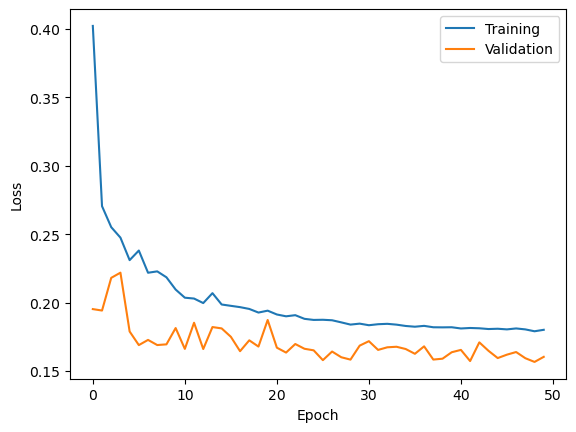

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("\nAccuracy:", history.history['accuracy'])
print("\nPrecision:", precision.round(2))
print("\nRecall:", recall.round(2))
print("\nF1-score:", f1.round(2))
print("\nConfusion Matrix:\n", conf_matrix)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

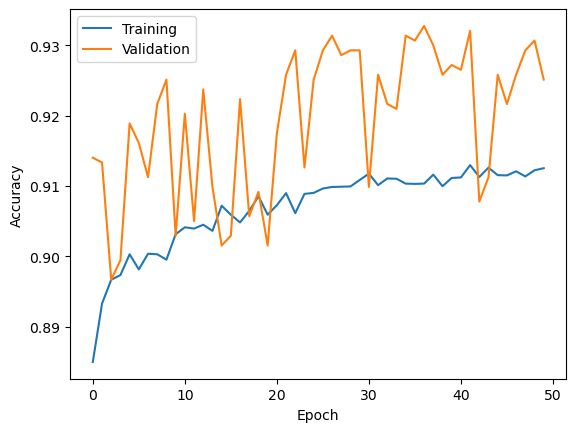

In [42]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Two models of regression and neural network have been used to predict the campaign results.
### The accuracy of both model is almost 90%.
### One of the criteria that could be used to compare two model is the confusion matrix. Regression model has 10911 and 574 while NN has the 10911 and 290 true positive and true negative respectively. Therefore, neural network works a littl ebetter.
### This is while the precision of regression model is higher but lower recall.
### Here, sigmoid function is used in the outter layer as the classification is binary and we want to know the No or Yes results based on the data. Therefore, binary loss function is also used in the model.
### To make the model better, I faced the bad accuracy and prediciton and after investigation, I realized that there has been some mistakes in implementation such as not removing the zero duration time from the dataset, or not using the one-ho-encoded to tranform the categorical data to binary or numerical values. After the manipulation, the results get acceptable.
### Also, various epoch and split for validation have been used to check how the results vary and reach the desirable parameter. However, it may not be optimized and need more parameters to be checked.